# Machine Learning Price Prediction

Am folosit baza asta de date https://www.kaggle.com/datasets/camnugent/california-housing-prices pentru a prezice pretul nediu a unei case dupa informatiile date despre acel district

descarcam dataset-ul

In [6]:
import sklearn
import numpy as np

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request


def load_housing_data():
    return pd.read_csv(Path("data/housing/housing.csv"))


housing = load_housing_data()


Il copiem in caz ca vom mai avea nevoie de el

In [7]:
housing_original = housing.copy()

Hai sa vedem niste date

In [8]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Hai sa vedem daca lipsesc date

In [9]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


observam ca nu toate au total_bedroom completat

Cate valori are fiecare categorie la ocean_proximity

In [10]:
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Sa vedem cum variaza datele care sunt cele mai intalnite

In [11]:
housing.describe()


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Extragem coloana cu ocean_proximity ca apoi sa facem hot encoding ca sa scapam de string-uri si sa avem doar valori numerice din cauza ca modelul nu are decat logica matematica si nu poate sa faca legaturi foarte bune intre cuvinte. Poate sa calculeze distanta dintre cuvinte sau sa faca asocieri proaste legate de proprietatile acelui sir

In [14]:
place_cat = housing[["ocean_proximity"]]
place_cat

ocean_proximity
0            NEAR BAY
1            NEAR BAY
2            NEAR BAY
3            NEAR BAY
4            NEAR BAY
...               ...
20635          INLAND
20636          INLAND
20637          INLAND
20638          INLAND
20639          INLAND

[20640 rows x 1 columns]

Facem Hot Encoder

In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_hot_encoder = cat_encoder.fit_transform(place_cat)
housing_cat_1hot_df = pd.DataFrame(
    housing_hot_encoder.toarray(), 
    columns=cat_encoder.get_feature_names_out(['ocean_proximity']),
    index=housing.index  
)


In [16]:
housing = housing.drop('ocean_proximity', axis=1)
housing = pd.concat([housing, housing_cat_1hot_df], axis=1)

Verificam daca a functionat

In [17]:
housing.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

Folosim metoda knn pentru a completa setul de date. Codul nostru cauta 5 cei mai apropiati vecini de acest rand din care lipsesc date si completeaza valoarea lipsa dupa vecinii gasiti

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) 

housing_imputed = imputer.fit_transform(housing)

complete_housing = pd.DataFrame(housing_imputed, columns=housing.columns)


In [19]:
complete_housing['total_bedrooms'].isnull().sum()

0

Vedem ca nu mai avem total_bedrooms care sa fie gol

In [16]:
complete_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  float64
 10  ocean_proximity_INLAND      20640 non-null  float64
 11  ocean_proximity_ISLAND      20640 non-null  float64
 12  ocean_proximity_NEAR BAY    20640 non-null  float64
 13  ocean_proximity_NEAR OCEAN  206

Ne mai avand string-uri putem vedea relatia de corelatie dintre mai multe caracteristici. Cu cat valoarea acelei caracteristici ii mai aproape de 1 cu atata influentiaza pozitiv rezultatul iar de -1 influentiaza negativ. Deci cele mai importante sunt cele care influentiaza rezultatul cele mai apropiate de 1 si -1 si cele mai nesimnificative d=cele apropiate de 0 

In [20]:
corr = complete_housing.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.050220
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

Nu prea ne ajuta asa de tare numarul total de camere din acel district cat ne-ar ajuta numarul de camera per casa sau cati oameni stau intr-o casa sau cate persoane pot dormi in ea(numarul de de dormitoare)

In [21]:
complete_housing["bedrooms_per_house"] = complete_housing["total_bedrooms"] / complete_housing["total_rooms"]

complete_housing["people_per_house"] = complete_housing["population"] / complete_housing["households"]

complete_housing["rooms_per_house"] = complete_housing["total_rooms"] / complete_housing["households"]


corr = complete_housing.corr(numeric_only=True)
corr["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
rooms_per_house               0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.050220
ocean_proximity_ISLAND        0.023416
people_per_house             -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_house           -0.256650
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

Vedem ca numarul de camera per casa e destul de valoros si cel de dormitoare per casa

Acum sa observam relatile dintre fiecare atribut mai important

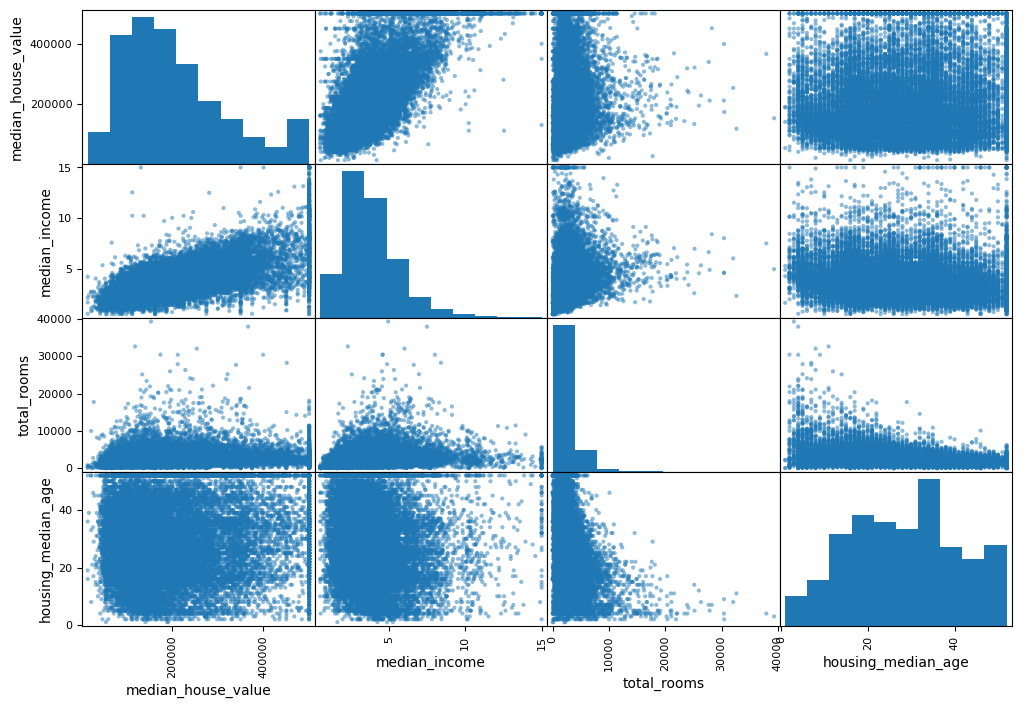

In [23]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(complete_housing[attributes], figsize=(12, 8))
plt.show()

Si observam din nou ca cea mai buna caracteristica pentru a prezice valoarea unei case este median_income

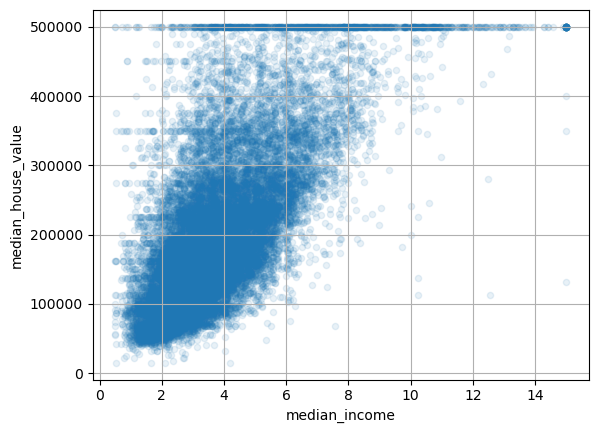

In [24]:
complete_housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

Acum ca am marit imaginea putem observa diferite linii la anumite valori: 50000, 35000, 28000, 48000 care ar trebui indepartate pentru a preveni ca modelul sa reproduca acele date asa ca le vom stratifica in 5 grupe

In [25]:
complete_housing["median-income-category"] = pd.cut(complete_housing["median_income"],
                               bins=[0., 1.5, 2.5, 4, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

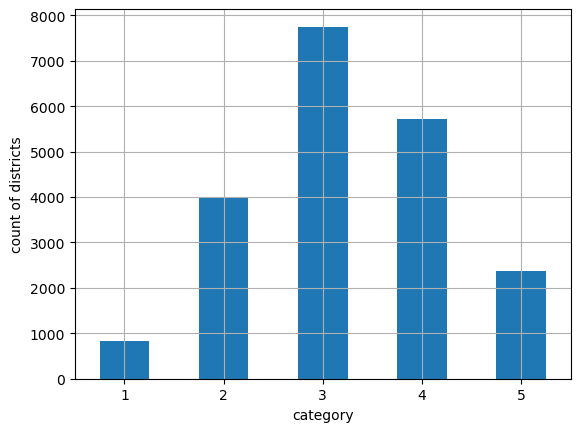

In [26]:
complete_housing["median-income-category"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("category")
plt.ylabel("count of districts")
plt.show()

Acum vrem sa facem sa avem si in setul de antrenament si in cel de test acelasi raport din fiecare instanta de median-income-category. In acelasi timp impartim datele in 0.8 train si 0.2 test

In [28]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(complete_housing, test_size=0.2, stratify=complete_housing["median-income-category"], random_state=42)

strat_train_set.drop("median-income-category", axis=1, inplace=True)
strat_test_set.drop("median-income-category", axis=1, inplace=True)


Facem niste copii de de rezerva

In [30]:
train_copy = strat_train_set.copy()
test_copy = strat_test_set.copy()

Avand asa de mare discrepanta numerica intre pret, longitudine, populatie latitudine si numarul de camere, varsta ... vom scala toate coloanele care au valori numerice cu exceptia la categoriile de loc unde se afla casa

In [32]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


columns_to_scale = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income", "total_bedrooms",
    "rooms_per_house", "housing_median_age", "people_per_house"
]

scaler = StandardScaler()
train_scaled_values = scaler.fit_transform(train_copy[columns_to_scale])


train_scaled = train_copy.copy()
train_scaled[columns_to_scale] = train_scaled_values


test_scaled_values = scaler.transform(test_copy[columns_to_scale])

test_scaled = test_copy.copy()
test_scaled[columns_to_scale] = test_scaled_values

train_scaled.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1671    1.049932 -0.787469            0.507809    -0.490973       -0.579824   
16704   0.780048 -0.792145            0.507809    -0.618168       -0.707760   
1687    0.760056 -0.712643            0.825912    -0.154227       -0.300260   
7675    1.234852 -1.343985           -0.366973    -0.637842       -0.385551   
16044  -1.468985  1.097203           -0.287447     1.778402        3.229823   

       population  households  median_income  median_house_value  \
1671    -0.333918   -0.578070      -0.183352            105400.0   
16704   -0.601153   -0.653734       0.556268            173900.0   
1687     0.144955   -0.246712       0.493408            273800.0   
7675    -0.177880   -0.361513      -1.055203             95000.0   
16044    4.025256    3.421707      -0.604224            187500.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
1671                         0.0                     1.0   
16704                        1.0                     0.0   
1687                         0.0                     1.0   
7675                         0.0                     0.0   
16044                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
1671                      0.0                       0.0   
16704                     0.0                       0.0   
1687                      0.0                       0.0   
7675                      0.0                       0.0   
16044                     0.0                       1.0   

       ocean_proximity_NEAR OCEAN  bedrooms_per_house  people_per_house  \
1671                          0.0            0.187739          0.058443   
16704                         0.0            0.186335         -0.006446   
1687                          0.0            0.178975          0.069759   
7675                          1.0            0.302008          0.025078   
16044                         0.0            0.291450          0.013673   

       rooms_per_house  
1671          0.069128  
16704        -0.108667  
1687          0.091135  
7675         -0.769376  
16044        -0.706761

In [35]:
test_scaled.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
11351  -1.264073  0.938199            0.507809    -0.652483       -0.752774   
20043  -0.119565  0.877403           -1.082704    -0.754971       -0.840434   
14678  -0.219522  1.354417           -1.003179     0.185722        0.010103   
12432  -0.074585  0.550040           -0.923653    -0.560061       -0.643792   
2078    0.550147 -0.750056            1.303066     0.532533        1.021744   

       population  households  median_income  median_house_value  \
11351   -0.572457   -0.671998       0.440600            174100.0   
20043   -0.916815   -0.912037      -0.366220            121900.0   
14678   -1.099755   -1.039883      -0.380560            140600.0   
12432   -0.508787   -0.541542      -0.327647             81400.0   
2078     0.234631    0.966528      -0.434743            456200.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
11351                        0.0                     0.0   
20043                        0.0                     1.0   
14678                        0.0                     1.0   
12432                        0.0                     1.0   
2078                         1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
11351                     0.0                       1.0   
20043                     0.0                       0.0   
14678                     0.0                       0.0   
12432                     0.0                       0.0   
2078                      0.0                       0.0   

       ocean_proximity_NEAR OCEAN  bedrooms_per_house  people_per_house  \
11351                         0.0            0.182193          0.012430   
20043                         0.0            0.186047         -0.036028   
14678                         0.0            0.178325         -0.097073   
12432                         0.0            0.188693         -0.014498   
2078                          0.0            0.255062         -0.100529   

       rooms_per_house  
11351        -0.170476  
20043         0.430489  
14678         9.419815  
12432        -0.233130  
2078         -0.411775

Pregatim setul de date stergand valoarea pretului care trebuie prezis

In [36]:
y_train = train_scaled["median_house_value"]
x_train = train_scaled.drop(columns=["median_house_value"])

y_test = test_scaled["median_house_value"]
x_test = test_scaled.drop(columns=["median_house_value"])

x_train_copy = x_train.copy()
y_train_copy = y_train.copy()
x_test_copy = x_test.copy()
y_test_copy = y_test.copy()




Aici o sa antrenam datele folosind cross-validation si apoi testa pe train. Cross-validation împarte setul de date în mai multe subseturi (folds) și utilizează fiecare subset atât pentru antrenament, cât și pentru validare. Aceasta oferă o estimare mai robustă a performanței modelului decât împărțirea simplă a setului de date în doar un set de antrenament și un set de test. 



Mean Squared Error (MSE): Măsoară media pătratelor diferențelor dintre valorile reale și cele prezise, penalizând erorile mari mai mult decât pe cele mici.

Root Mean Squared Error (RMSE): Este rădăcina pătrată a MSE și măsoară eroarea medie în aceleași unități ca datele originale, penalizând erorile mari.

Mean Absolute Error (MAE): Măsoară media diferențelor absolute dintre valorile reale și cele prezise, fără a penaliza erorile mari mai mult decât pe cele mici.

Acum aplicam Linear Regression

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


model = LinearRegression()
model.fit(x_train_copy, y_train_copy)

cv_mse_scores = -cross_val_score(
    model,
    x_train_copy,
    y_train_copy,
    cv=5,
    scoring='neg_mean_squared_error'
)

cv_rmse_scores = np.sqrt(cv_mse_scores)

cv_mae_scores = -cross_val_score(
    model,
    x_train_copy,
    y_train_copy,
    cv=5,
    scoring='neg_mean_absolute_error'
)

print("=== Cross-Validation pe Train Set ===")
print("MSE scores per fold:", cv_mse_scores)
print("Mean MSE:", cv_mse_scores.mean())
print("RMSE scores per fold:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("MAE scores per fold:", cv_mae_scores)
print("Mean MAE:", cv_mae_scores.mean())
print()

y_test_pred = model.predict(x_test_copy)

test_mse = mean_squared_error(y_test_copy, y_test_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test_copy, y_test_pred)

print("=== Evaluare pe Test Set ===")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


=== Cross-Validation pe Train Set ===
MSE scores per fold: [4.53840496e+09 4.55651704e+09 4.62129547e+09 4.53984831e+09
 4.60885784e+09]
Mean MSE: 4572984722.7189665
RMSE scores per fold: [67367.6847982  67501.97804415 67980.11084536 67378.3964344
 67888.56930318]
Mean RMSE: 67623.34788505951
MAE scores per fold: [48402.70704665 49517.65381467 49183.16512704 48584.38338416
 49430.58049885]
Mean MAE: 49023.697974272785

=== Evaluare pe Test Set ===
Test MSE: 4876049624.633695
Test RMSE: 69828.71633242082
Test MAE: 49408.715607458435


Prezice cu o eroare de 67623.35 valoarea casei cea ce nu ii foarte bine


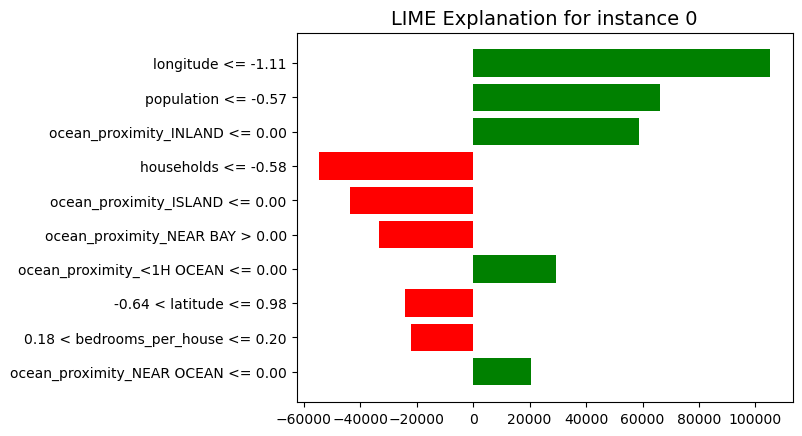

In [40]:
import lime
import lime.lime_tabular
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_copy),
    feature_names=x_train_copy.columns.tolist(),
    mode='regression'
)


i = 0 


exp = explainer.explain_instance(
    data_row=x_test_copy.iloc[i].values, 
    predict_fn=lambda x: model.predict(pd.DataFrame(x, columns=x_train_copy.columns))
)

exp.show_in_notebook(show_table=True, show_all=False)

fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for instance {i}", fontsize=14)
plt.show()


Vedem ca e foarte importanta pozitia casei. Se prefera sa fie mai aproape de plaja si in zone mai aglomerate unde locuiesc mai multi

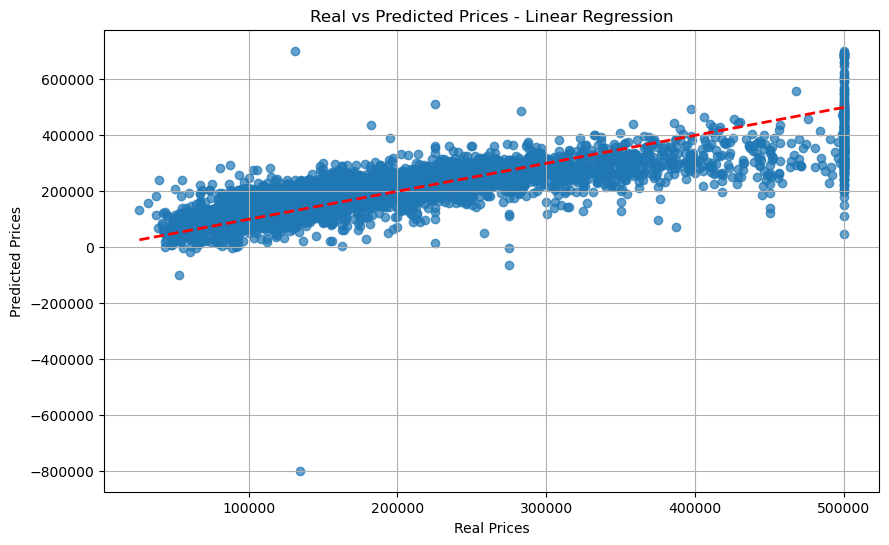

In [36]:
import matplotlib.pyplot as plt

# Predict on the full test set
y_test_pred = model.predict(x_test_copy)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_copy, y_test_pred, alpha=0.7)
plt.plot([y_test_copy.min(), y_test_copy.max()], [y_test_copy.min(), y_test_copy.max()], 'r--', lw=2)
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted Prices - Linear Regression')
plt.grid(True)
plt.show()


Acum facem knn care ne prezice valoarea casei in functie de k = 5 cei mai apropiati vecini, cele mai asemanatoare randuri cu acel rand

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train_copy, y_train_copy)

cv_mse_scores = -cross_val_score(
    knn_model,
    x_train_copy,
    y_train_copy,
    cv=5,
    scoring='neg_mean_squared_error'
)

cv_rmse_scores = np.sqrt(cv_mse_scores)

cv_mae_scores = -cross_val_score(
    knn_model,
    x_train_copy,
    y_train_copy,
    cv=5,
    scoring='neg_mean_absolute_error'
)

print("=== Cross-Validation pe Train Set ===")
print("MSE scores per fold:", cv_mse_scores)
print("Mean MSE:", cv_mse_scores.mean())
print("RMSE scores per fold:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("MAE scores per fold:", cv_mae_scores)
print("Mean MAE:", cv_mae_scores.mean())
print()


y_test_pred = knn_model.predict(x_test_copy)

# MSE pe test
test_mse = mean_squared_error(y_test_copy, y_test_pred)

# RMSE pe test
test_rmse = np.sqrt(test_mse)

# MAE pe test
test_mae = mean_absolute_error(y_test_copy, y_test_pred)

print("=== Evaluare pe Test Set ===")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


=== Cross-Validation pe Train Set ===
MSE scores per fold: [3.78483111e+09 3.83272647e+09 3.80437284e+09 3.58083888e+09
 3.88203569e+09]
Mean MSE: 3776960996.9754777
RMSE scores per fold: [61520.98109399 61909.01764664 61679.59822515 59840.11097537
 62305.98434643]
Mean RMSE: 61451.1384575164
MAE scores per fold: [41210.20974871 41850.86412352 41268.5654149  40237.42344034
 42427.54391278]
Mean MAE: 41398.92132805134

=== Evaluare pe Test Set ===
Test MSE: 3655641065.8477426
Test RMSE: 60461.8976368402
Test MAE: 40564.53531976744


e mai bine cu o predictie de 7 milioane mai buna

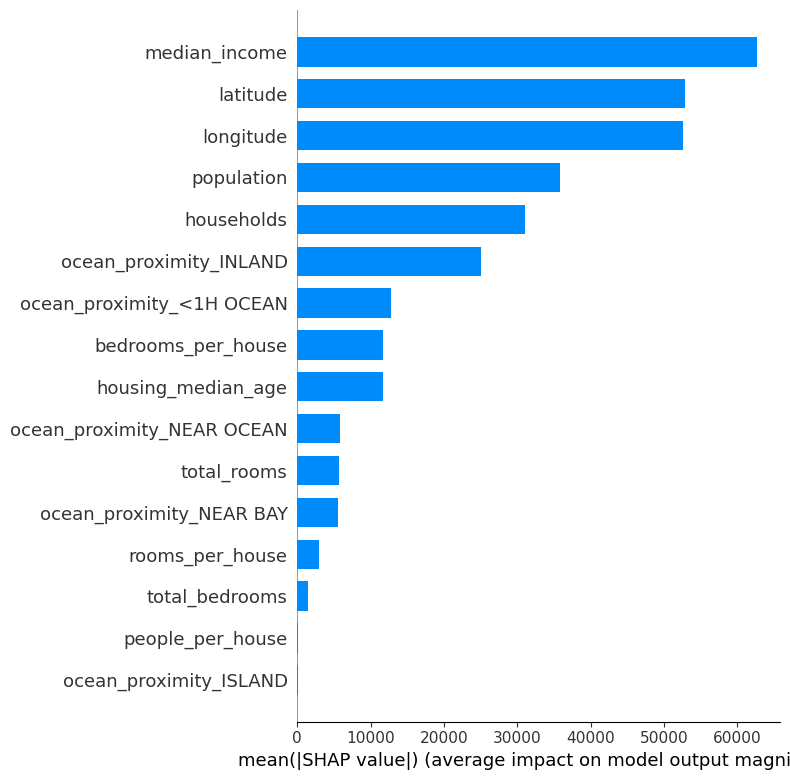

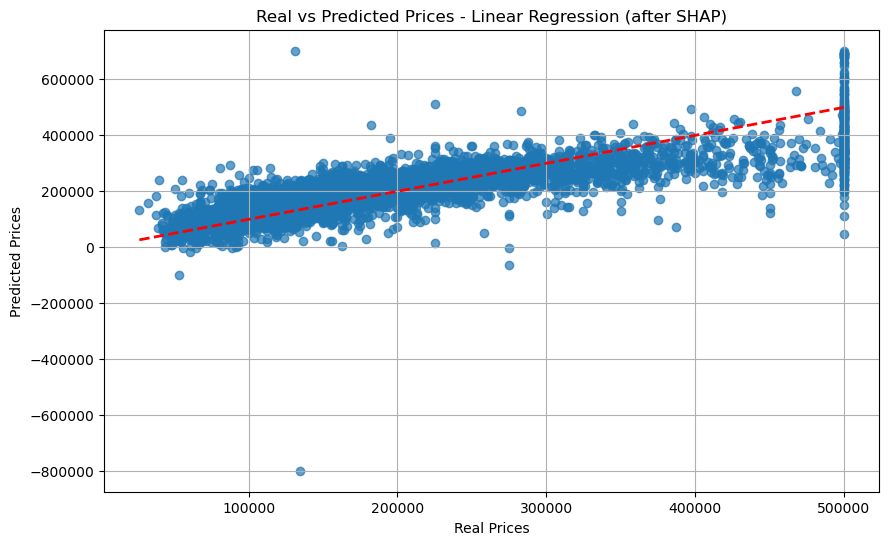

In [42]:

import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


explainer = shap.Explainer(model, x_train_copy)

shap_values = explainer(x_test_copy)

shap.summary_plot(shap_values, x_test_copy, plot_type='bar')

y_test_pred = model.predict(x_test_copy)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_copy, y_test_pred, alpha=0.7)
plt.plot([y_test_copy.min(), y_test_copy.max()], [y_test_copy.min(), y_test_copy.max()], 'r--', lw=2)
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted Prices - Linear Regression (after SHAP)')
plt.grid(True)
plt.show()


vedem ca cea mai importanta caracteristica a fost venitul mediu dar si locatia data de coordonate dar si de populatie si densitate

Acum facem Support Vector Machine


In [43]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

svm_model = SVR(kernel='rbf')  
svm_model.fit(x_train_copy, y_train_copy)

cv_mse_scores = -cross_val_score(
    svm_model,
    x_train_copy,
    y_train_copy,
    cv=5,
    scoring='neg_mean_squared_error'
)

cv_rmse_scores = np.sqrt(cv_mse_scores)

cv_mae_scores = -cross_val_score(
    svm_model,
    x_train_copy,
    y_train_copy,
    cv=5,
    scoring='neg_mean_absolute_error'
)

print("=== Cross-Validation pe Train Set (SVM) ===")
print("MSE scores per fold:", cv_mse_scores)
print("Mean MSE:", cv_mse_scores.mean())
print("RMSE scores per fold:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("MAE scores per fold:", cv_mae_scores)
print("Mean MAE:", cv_mae_scores.mean())
print()

y_test_pred = svm_model.predict(x_test_copy)

# MSE pe test
test_mse = mean_squared_error(y_test_copy, y_test_pred)

# RMSE pe test
test_rmse = np.sqrt(test_mse)

# MAE pe test
test_mae = mean_absolute_error(y_test_copy, y_test_pred)

print("=== Evaluare pe Test Set (SVM) ===")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


=== Cross-Validation pe Train Set (SVM) ===
MSE scores per fold: [1.35740527e+10 1.42224495e+10 1.37308694e+10 1.39445756e+10
 1.40999678e+10]
Mean MSE: 13914382994.012753
RMSE scores per fold: [116507.7365867  119257.91149529 117178.7924867  118087.15266048
 118743.28528042]
Mean RMSE: 117954.97570191941
MAE scores per fold: [87291.26113819 88843.34242584 87357.12347953 87466.56509461
 88372.72858237]
Mean MAE: 87866.20414410735

=== Evaluare pe Test Set (SVM) ===
Test MSE: 14195193861.70654
Test RMSE: 119143.58506317719
Test MAE: 88859.37506655171


Cu Svm e destul de rau prezice ft eronat pretul

  0%|          | 0/50 [00:00<?, ?it/s]

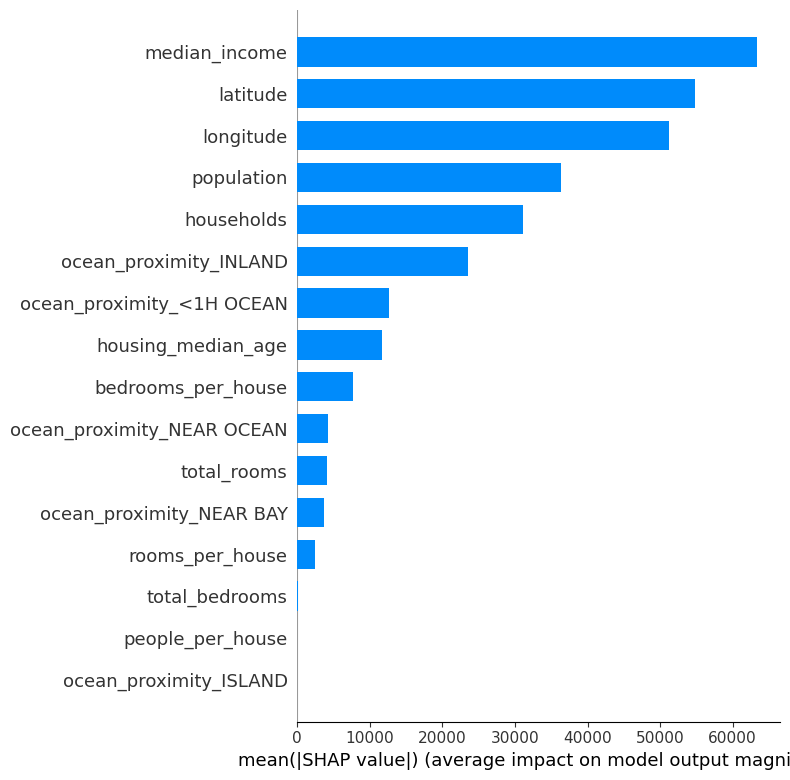

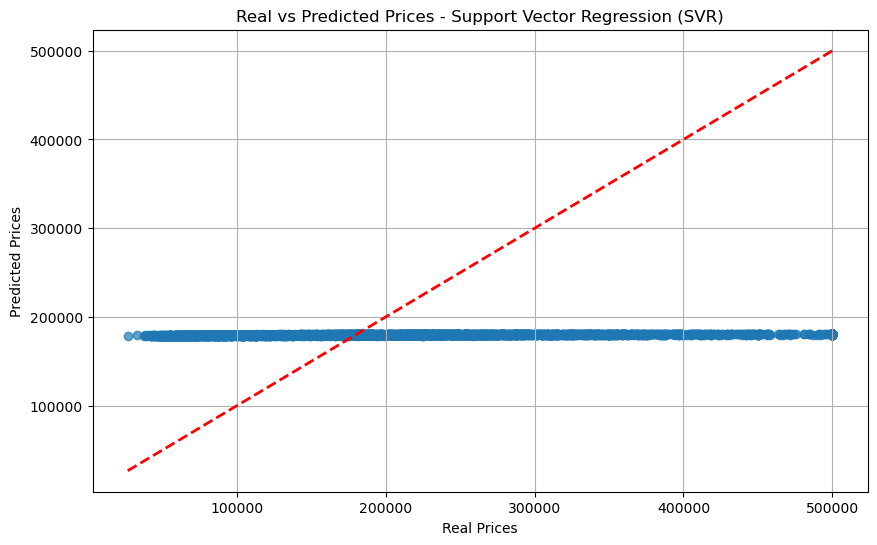

In [44]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


explainer = shap.KernelExplainer(
    model.predict,
    shap.sample(x_train_copy, 100)
)

shap_values = explainer.shap_values(x_test_copy.iloc[:50])

shap.summary_plot(shap_values, x_test_copy.iloc[:50], plot_type="bar")



plt.figure(figsize=(10, 6))
plt.scatter(y_test_copy, y_test_pred, alpha=0.7)
plt.plot(
    [y_test_copy.min(), y_test_copy.max()],
    [y_test_copy.min(), y_test_copy.max()],
    'r--', lw=2
)
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted Prices - Support Vector Regression (SVR)')
plt.grid(True)
plt.show()


Era foarte greu ca modelul acesta sa prezica pretul pe setul asta de date si vedem ca foloseste cam aceleasi caracteristici

Acum facem cu DecisionTree

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

tree_model = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train_copy, y_train_copy)

print("Best parameters found:", grid_search.best_params_)


cv_best_mse = -grid_search.best_score_

cv_best_rmse = np.sqrt(cv_best_mse)

print("\n=== Performanță pe Train Set (Cross-Validation) ===")
print(f"Best MSE (CV): {cv_best_mse}")
print(f"Best RMSE (CV): {cv_best_rmse}")

best_tree_model = grid_search.best_estimator_


y_train_pred = best_tree_model.predict(x_train_copy)

train_mae = mean_absolute_error(y_train_copy, y_train_pred)
print(f"MAE (train pe model optimizat): {train_mae}")


y_test_pred = best_tree_model.predict(x_test_copy)

test_mse = mean_squared_error(y_test_copy, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_copy, y_test_pred)

print("\n=== Performanță pe Test Set ===")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

=== Performanță pe Train Set (Cross-Validation) ===
Best MSE (CV): 3559218073.971373
Best RMSE (CV): 59659.18264585405
MAE (train pe model optimizat): 27468.88120205171

=== Performanță pe Test Set ===
Test MSE: 3386961545.381829
Test RMSE: 58197.60772902808
Test MAE: 38589.62249861706


Avem tot o eroare de vreo 60000 si cu acest model



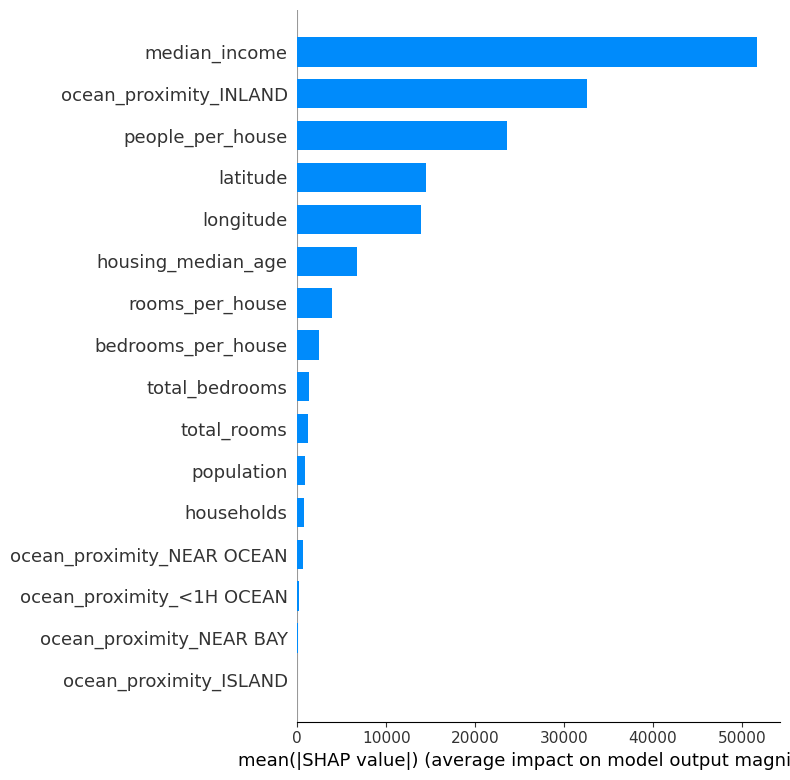

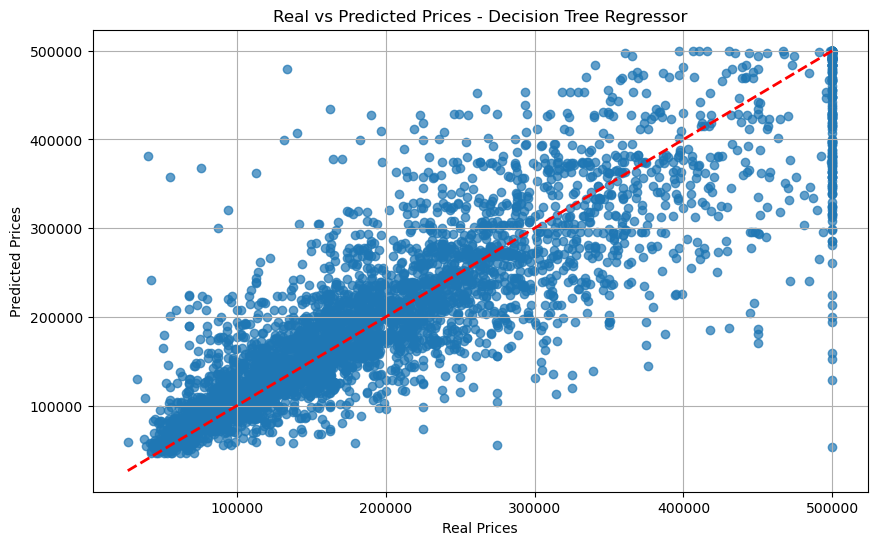

In [48]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(best_tree_model)

shap_values = explainer.shap_values(x_test_copy)

shap.summary_plot(shap_values, x_test_copy, plot_type='bar')

plt.figure(figsize=(10, 6))
plt.scatter(y_test_copy, y_test_pred, alpha=0.7)
plt.plot(
    [y_test_copy.min(), y_test_copy.max()],
    [y_test_copy.min(), y_test_copy.max()],
    'r--', lw=2
)
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted Prices - Decision Tree Regressor')
plt.grid(True)
plt.show()



vedem ca modelul foloseste mai mult venitul mediu dar si daca casa este de tip Inland sau nu

Acum folosim Decision Forest care utilizeaza mai multe modele de Decision tree

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rf_base_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 250, 300],    
    'max_depth': [5, 6, 8],         
    'min_samples_split': [10, 15, 20],  
    'min_samples_leaf': [10,15, 20],  
    'max_features': ['sqrt', 'log2']  
}

random_search = RandomizedSearchCV(
    estimator=rf_base_model,
    param_distributions=param_grid,
    n_iter=15,  
    cv=5,       
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(x_train_copy, y_train_copy)

print("Best parameters found:", random_search.best_params_)
print("Best RMSE score (train CV):", np.sqrt(-random_search.best_score_))

best_rf_model = random_search.best_estimator_

y_test_pred = best_rf_model.predict(x_test_copy)

test_mse = mean_squared_error(y_test_copy, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_copy, y_test_pred)

y_train_pred = best_rf_model.predict(x_train_copy)

train_mse = mean_squared_error(y_train_copy, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_copy, y_train_pred)


print("\n=== Evaluare pe Setul de Antrenament ===")
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)

print("\n=== Evaluare Finală pe Test Set ===")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)




Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters found: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 8}
Best RMSE score (train CV): 56907.002370360045

=== Evaluare pe Setul de Antrenament ===
Train MSE: 2857674023.6500216
Train RMSE: 53457.21675929286
Train MAE: 37833.21842619184

=== Evaluare Finală pe Test Set ===
Test MSE: 3183277395.4938555
Test RMSE: 56420.54054592047
Test MAE: 40224.6184735381


avem un rezultat destul de dezamagitor, am putea sa il optimizam shimband parametrii de la RandomSearchCv dar cand am incercat am ajuns la overfiting

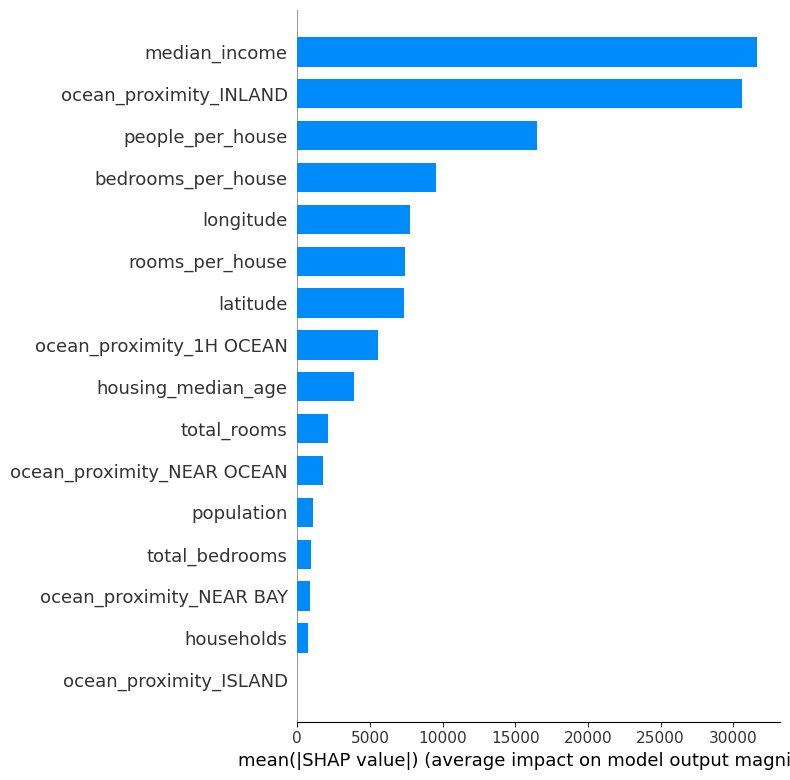

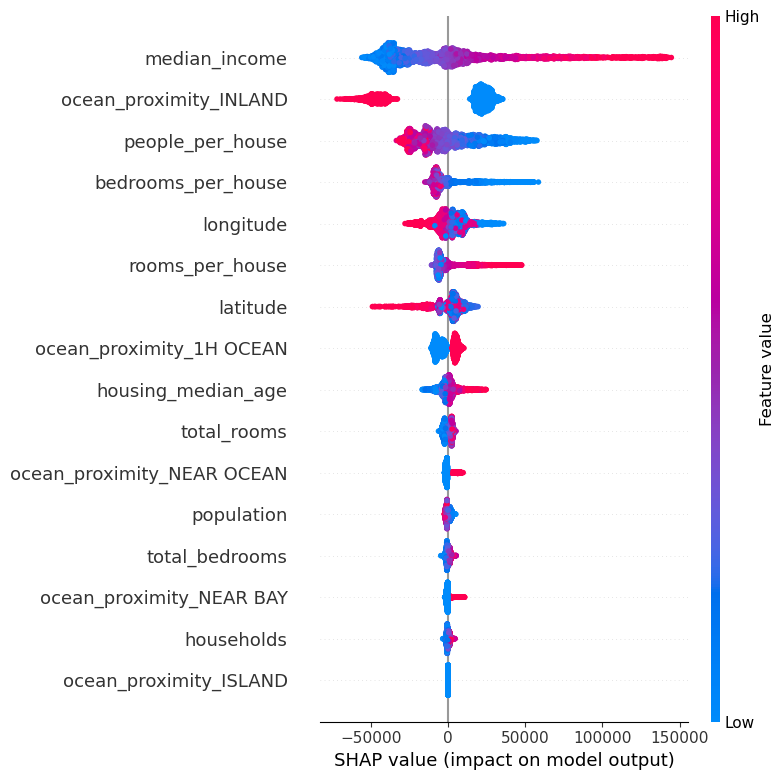

In [86]:

explainer = shap.TreeExplainer(best_rf_model)


shap_values = explainer.shap_values(x_test_copy)


shap.summary_plot(shap_values, x_test_copy, plot_type="bar")


shap.summary_plot(shap_values, x_test_copy)


Aici spre deosebire de celelalte vedem ca conteaza si cati oameni traiesc per casa

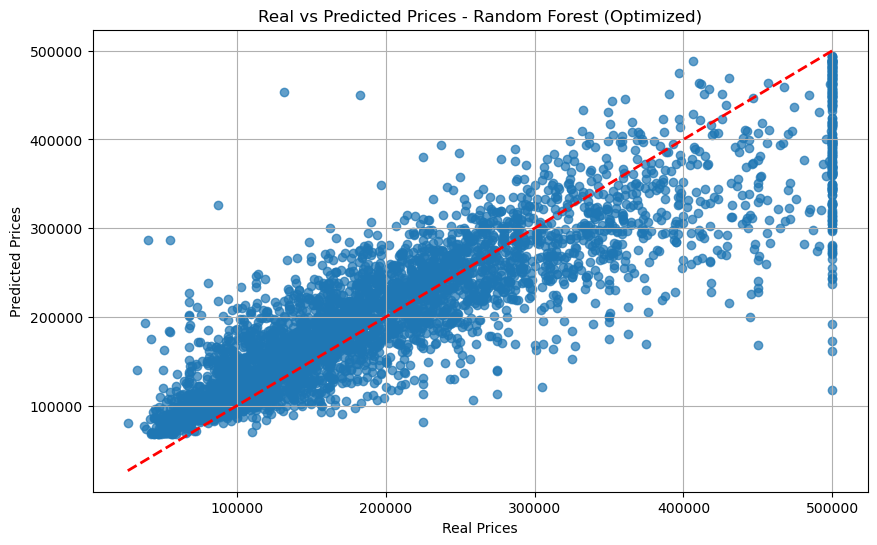

In [88]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test_copy, y_test_pred, alpha=0.7)
plt.plot(
    [y_test_copy.min(), y_test_copy.max()],
    [y_test_copy.min(), y_test_copy.max()],
    'r--', lw=2
)
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted Prices - Random Forest (Optimized)')
plt.grid(True)
plt.show()


Acum folosim XGBoost

In [95]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


xgb_model = XGBRegressor(random_state=42)

def clean_column_names(df):
    df.columns = df.columns.map(str)
    df.columns = df.columns.str.replace(r"[\[\]<>]", "", regex=True)
    return df

x_train_copy_xg = clean_column_names(x_train_copy)
x_test_copy_xg = clean_column_names(x_test_copy)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05],  
    'subsample': [0.7, 0.8], 
    'colsample_bytree': [0.7, 0.8],
    'min_child_weight': [10, 20], 
    'gamma': [0, 0.1], 
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1, 1]
}




random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=40,      
    cv=5,           
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(x_train_copy_xg, y_train_copy)

print("Best parameters found:", random_search.best_params_)
print("Best RMSE score (train CV):", np.sqrt(-random_search.best_score_))

best_xgb_model = random_search.best_estimator_

y_test_pred = best_xgb_model.predict(x_test_copy_xg)

test_mse = mean_squared_error(y_test_copy, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_copy, y_test_pred)

y_train_pred = best_xgb_model.predict(x_train_copy_xg)

train_mse = mean_squared_error(y_train_copy, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_copy, y_train_pred)

print("\n=== Evaluare pe Setul de Antrenament ===")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAE: {train_mae}")

print("\n=== Evaluare pe Test Set ===")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")




Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best RMSE score (train CV): 48200.74552936972

=== Evaluare pe Setul de Antrenament ===
Train MSE: 1794720826.8343418
Train RMSE: 42364.145534099254
Train MAE: 29029.603444653887

=== Evaluare pe Test Set ===
Test MSE: 2257921958.242159
Test RMSE: 47517.596301182566
Test MAE: 32052.90004712482


Pana acum acesta e cel mai cu o eroare de aproximare de 47517 cea ce ii mai bine decat 60000 desi e la risc de overfiting

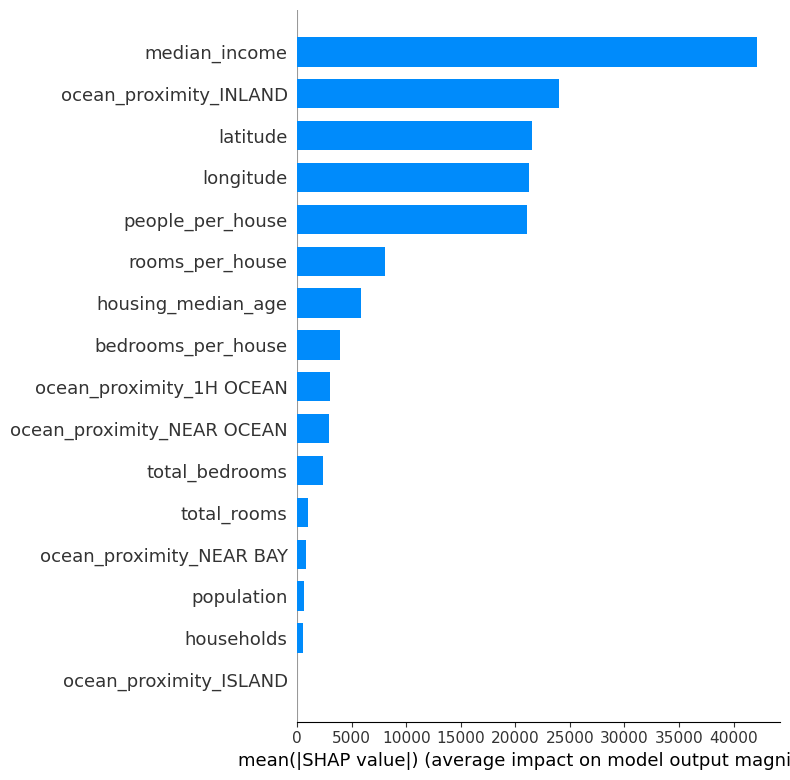

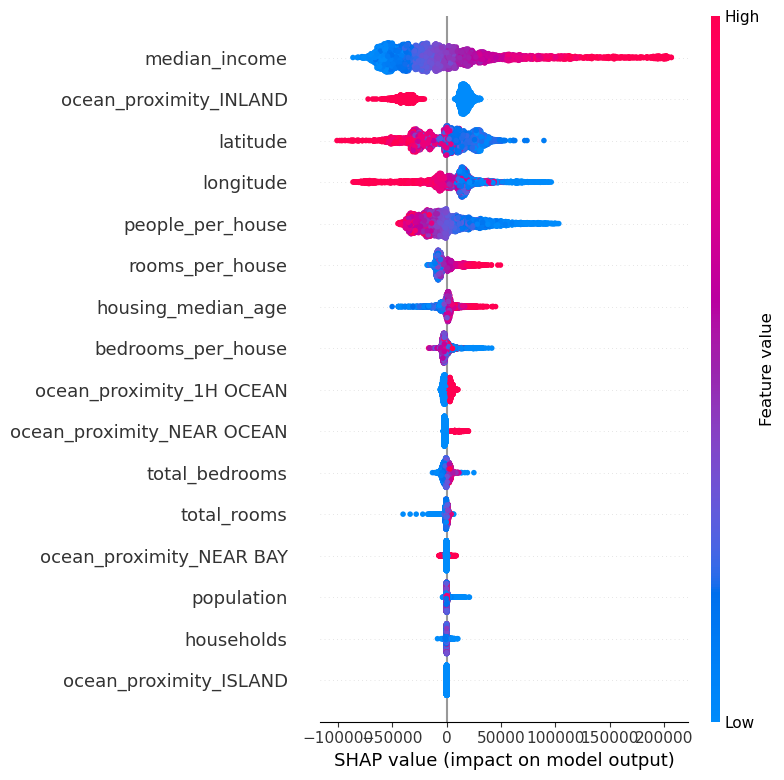

In [97]:

explainer = shap.TreeExplainer(best_xgb_model)

shap_values = explainer.shap_values(x_test_copy)

shap.summary_plot(shap_values, x_test_copy, plot_type="bar")

shap.summary_plot(shap_values, x_test_copy)


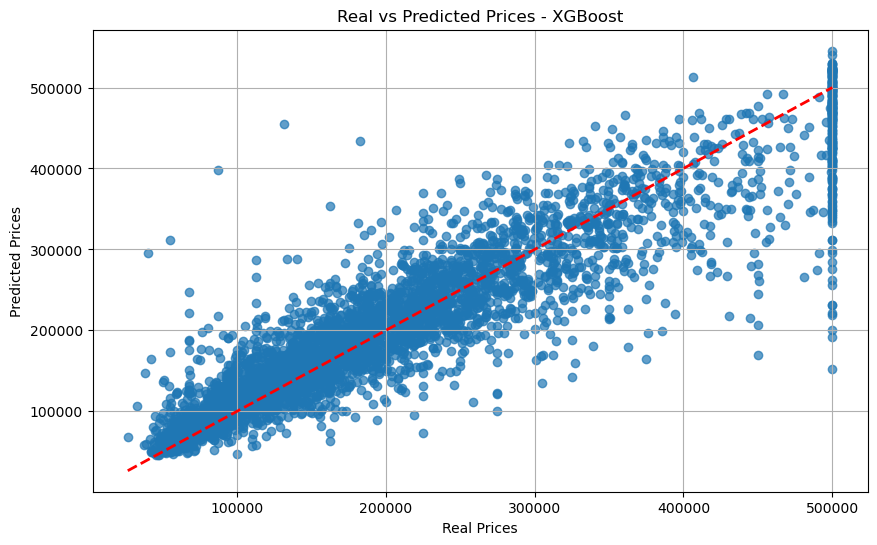

In [96]:

plt.figure(figsize=(10,6))
plt.scatter(y_test_copy, y_test_pred, alpha=0.7)
plt.plot(
    [y_test_copy.min(), y_test_copy.max()],
    [y_test_copy.min(), y_test_copy.max()],
    'r--', lw=2
)
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted Prices - XGBoost')
plt.grid(True)
plt.show()


Acum folosim CatBoost

In [101]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np



cat_model = CatBoostRegressor(random_state=42, verbose=0)


param_grid = {
    'iterations': [100, 200, 250],   
    'depth': [4, 5],                 
    'learning_rate': [0.01, 0.05],   
    'l2_leaf_reg': [3, 5, 7],        
}


random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_grid,
    n_iter=20,  
    cv=5,       
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)


random_search.fit(x_train_copy, y_train_copy)


best_cat_model = random_search.best_estimator_


print("Best parameters found:", random_search.best_params_)
print("Best RMSE score (train CV):", np.sqrt(-random_search.best_score_))


y_test_pred = best_cat_model.predict(x_test_copy)

test_mse = mean_squared_error(y_test_copy, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_copy, y_test_pred)

y_train_pred = best_cat_model.predict(x_train_copy)

train_mse = mean_squared_error(y_train_copy, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_copy, y_train_pred)


print("\n=== Evaluare pe Setul de Antrenament (CatBoost) ===")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAE: {train_mae}")
print("\n=== Evaluare pe Test Set (CatBoost) ===")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")




Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 250, 'depth': 5}
Best RMSE score (train CV): 50650.417392243784

=== Evaluare pe Setul de Antrenament (CatBoost) ===
Train MSE: 2352787545.1894093
Train RMSE: 48505.54138641697
Train MAE: 33451.18970781973

=== Evaluare pe Test Set (CatBoost) ===
Test MSE: 2558882129.835626
Test RMSE: 50585.39443194672
Test MAE: 34651.86177570807


Avem rezultate asemanatoare cu celelalte si mai rele decat la xgboost

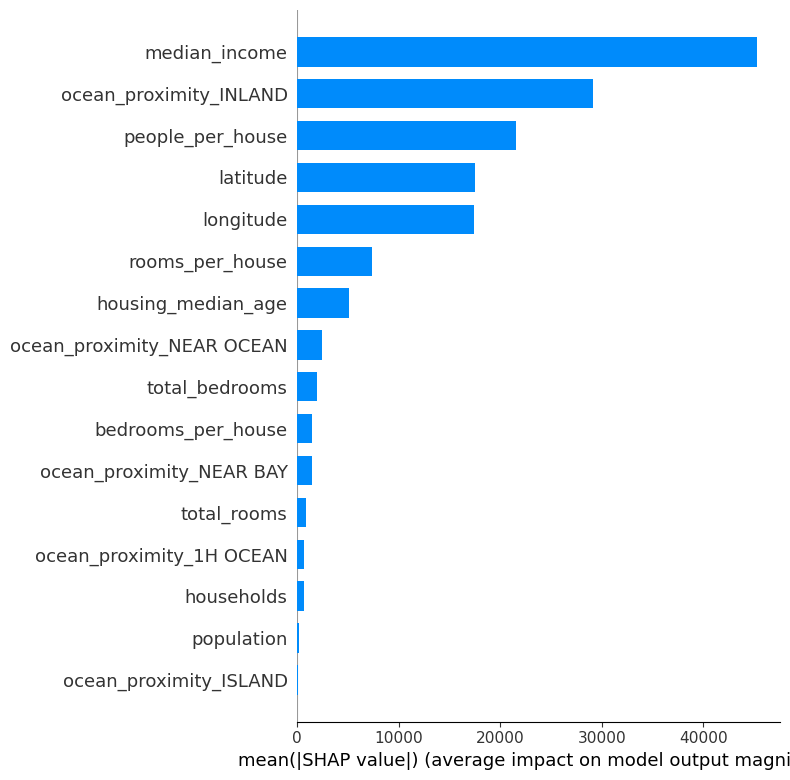

In [102]:
import shap

explainer = shap.TreeExplainer(best_cat_model)
shap_values = explainer.shap_values(x_test_copy)

shap.summary_plot(shap_values, x_test_copy, plot_type="bar")


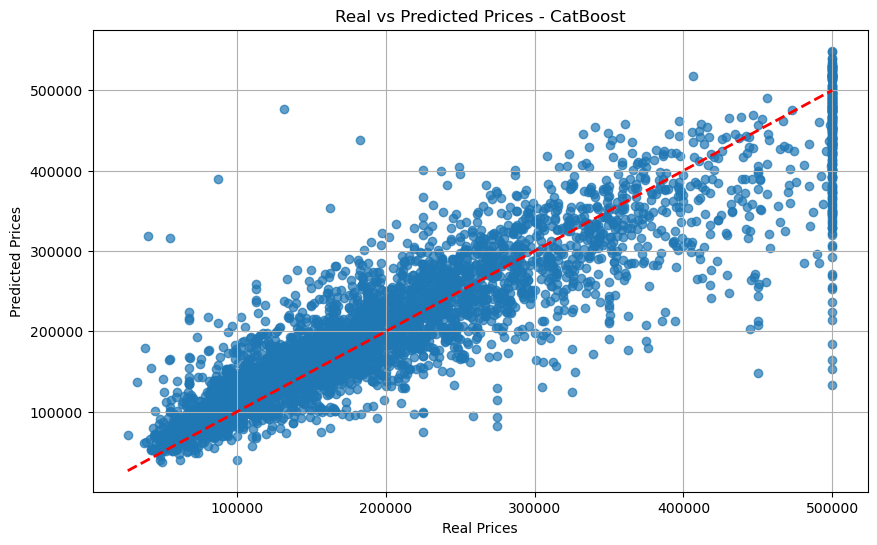

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_copy, y_test_pred, alpha=0.7)
plt.plot(
    [y_test_copy.min(), y_test_copy.max()],
    [y_test_copy.min(), y_test_copy.max()],
    'r--', lw=2
)
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted Prices - CatBoost')
plt.grid(True)
plt.show()


Acum folosim EBM

In [104]:
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

ebm_model = ExplainableBoostingRegressor(random_state=42)

param_dist = {
    "max_bins": [8, 16, 32, 64],
    "interactions": [1, 2, 3, 4, 5],
    "max_rounds": [20, 30, 50, 100],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
}

random_search = RandomizedSearchCV(
    ebm_model, 
    param_distributions=param_dist, 
    n_iter=10,  
    cv=5,  
    random_state=42,
    n_jobs=-1 
)

random_search.fit(x_train_copy, y_train_copy)

best_model = random_search.best_estimator_

y_test_pred = best_model.predict(x_test_copy)

test_mse = mean_squared_error(y_test_copy, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_copy, y_test_pred)
test_r2 = r2_score(y_test_copy, y_test_pred)

y_train_pred = best_model.predict(x_train_copy)

train_mse = mean_squared_error(y_train_copy, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_copy, y_train_pred)
train_r2 = r2_score(y_train_copy, y_train_pred)

print("\n=== Evaluare pe Setul de Antrenament (cu Random Search) ===")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAE: {train_mae}")
print(f"Train R2 Score: {train_r2}")

print("\n=== Evaluare pe Test Set (cu Random Search) ===")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2 Score: {test_r2}")





=== Evaluare pe Setul de Antrenament (cu Random Search) ===
Train MSE: 3428022851.2273283
Train RMSE: 58549.31981865655
Train MAE: 42385.03668804123
Train R2 Score: 0.7413047586126624

=== Evaluare pe Test Set (cu Random Search) ===
Test MSE: 3500781753.243031
Test RMSE: 59167.40448289946
Test MAE: 42644.84783474529
Test R2 Score: 0.7420696689732834


vedem ca e mai bine decat la xgboost si catboost si nu avem parte de overfiting

Importanțele: 17 - Caracteristici: 16


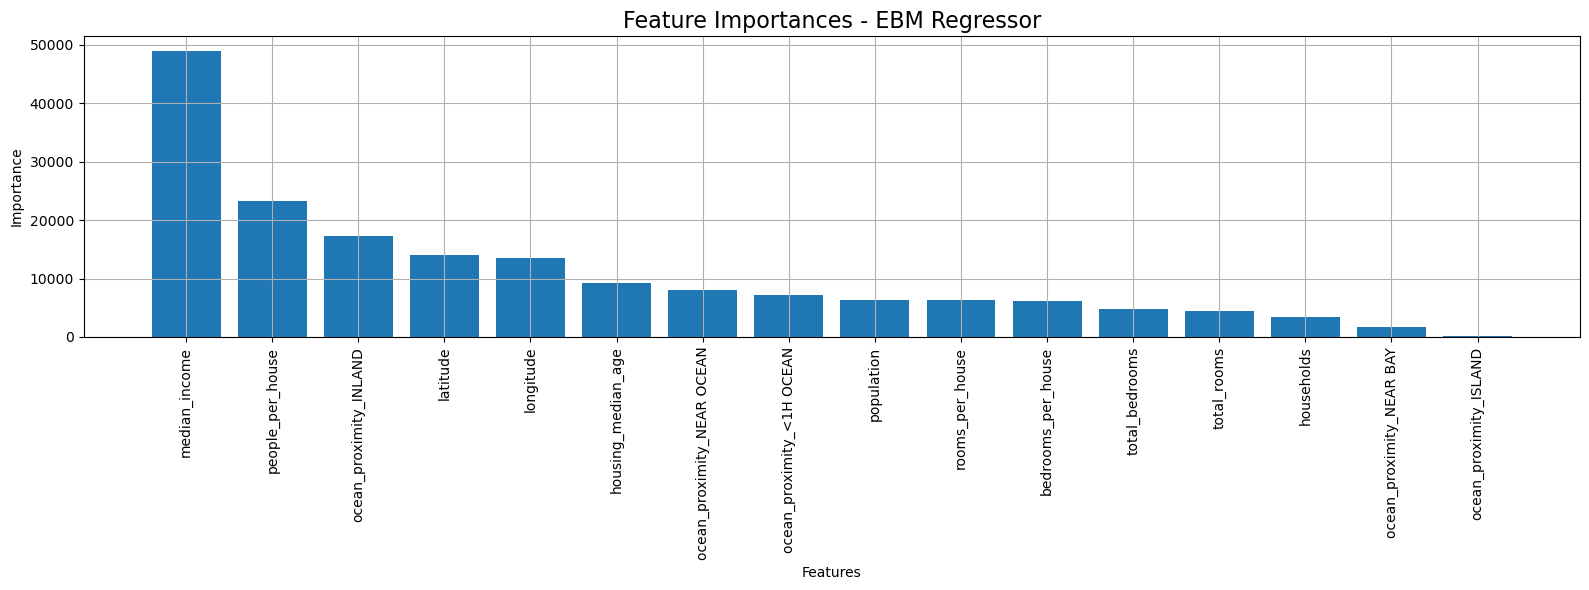

In [105]:
import matplotlib.pyplot as plt
import numpy as np


importances = best_model.term_importances()


features = x_train.columns

if len(importances) > len(features):
    print(f"Importanțele: {len(importances)} - Caracteristici: {len(features)}")
    importances = importances[:len(features)]
    
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(16, 6))
plt.title("Feature Importances - EBM Regressor", fontsize=16)
plt.bar(range(len(importances)), np.array(importances)[indices], align="center")
plt.xticks(range(len(importances)), np.array(features)[indices], rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()


nimic nou

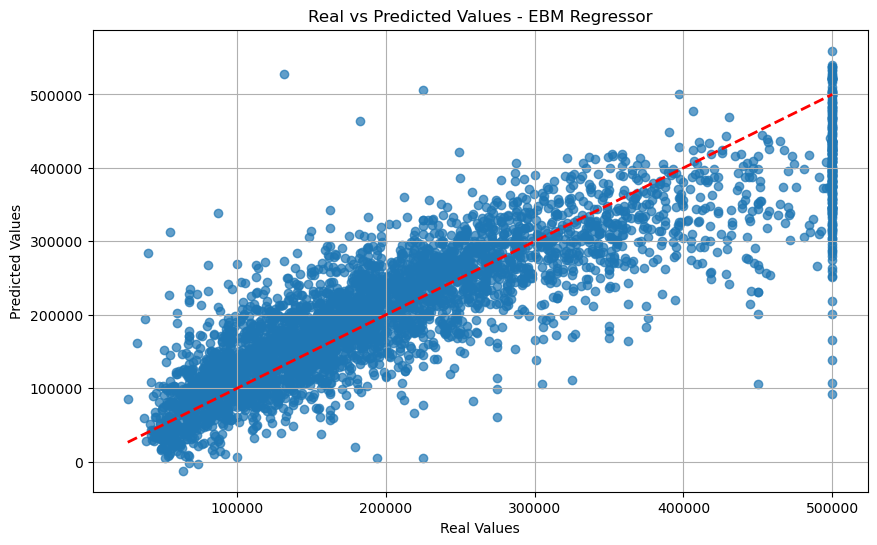

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_copy, y_test_pred, alpha=0.7)
plt.plot(
    [y_test_copy.min(), y_test_copy.max()],
    [y_test_copy.min(), y_test_copy.max()],
    'r--', lw=2
)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values - EBM Regressor')
plt.grid(True)
plt.show()


Concluzie: cel mai bune modele sunt catbooster si xgbooster iar partea buna e ca nu avem probleme mari de overfiting sau underfiting